# Seaborn | Part-2: Controlling Aesthetics of Seaborn Plots

One of the biggest advantages of Seaborn over Matplotlib is that its default aesthetics are visually far more appealing. Undoubtedly Matplotlib is highly customizable, but sometimes it may get difficult to know exact settings to tweak in order to achieve an attractive plot. Whereas, Seaborn comes with a number of customized themes and a high-level interface for controlling the look of same matplotlib figures.

Seaborn splits Matplotlib parameters into two independent groups: *First* group sets the aesthetic style of the plot; and *second* scales various elements of the figure to get easily incorporated into different contexts.

Seaborn doesn’t take away any of Matplotlib credits, but rather adds some nice default aesthetics and built-in plots that complement and sometimes replace the complicated Matplotlib code professionals needed to write. *Facet plots* and *Regression plots* are an example of that. In this lecture I shall show how easy it is to build a *Regression plot* using Seaborn and then let us compare it by building something similar in Matplotlib.

Quick Note (for non-native English speakers): The term *Aesthetics* just refers to the appearance of the figure/plot.

In [1]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, once we have imported necessary libraries, let us begin talking about aesthetics with those 2 special lines of code we had added in our previous lecture. Our first line of code was:

In [2]:
%matplotlib inline

`%matplotlib` is one of the *magic function* of Jupyter Notebook that along with `inline` [sets the backend of matplotlib](http://ipython.readthedocs.io/en/stable/interactive/plotting.html) to the *inline* backend within Jupyter notebook. If we look into relevant documentation, it says:

>IPython has a set of predefined ‘magic functions’ that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Lines magics can return results and can be used in the right hand side of an assignment. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.

>With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.<

Furthermore, if we want interactivity as well, we can use `nbagg` backend with `%matplotlib` notebook (in IPython 3.x). Though we won't be getting into that extremely advanced level of Matplotlib specific presentation here, but if that interest you, please check [here](https://matplotlib.org/users/whats_new.html#the-nbagg-backend).

Let us now move on to our second line of code:


In [39]:
sns.set()

Seaborn runs on top of Matplotlib and with that as a default comes a *White* background for each of our plot, that looks pretty dull. With this line of code, we switch our plot to Seaborn default using `.set()` function. Let us look into what it yields, using one of the built-in dataset:

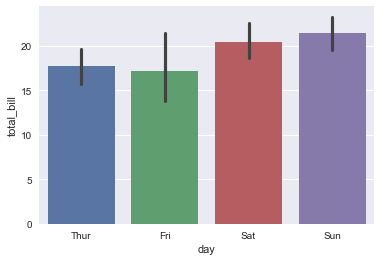

In [40]:
tips = sns.load_dataset("tips")

sns.barplot(x = "day", y = "total_bill", data = tips)

Quick Note: `sns.set()` needs to be explicitly called ONLY in Seaborn v0.8 and above.

With both the lines of code explained, let us now look into what else can we do to vary appearance of our plot. Earlier we spoke about Seaborn segregating Matplotlib parameters into 2 independent groups: *Styling* and *Scaling* of figures.

Let us begin by delving into *Styling* aspect, that is controlled by using `sns.axes_style()` and `sns.set_style()` functions.

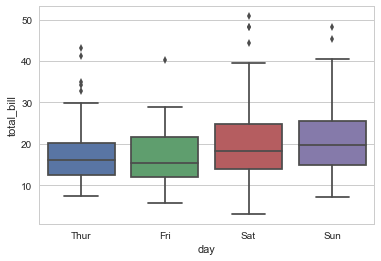

In [22]:
sns.set_style("whitegrid")
sns.boxplot(x = "day", y = "total_bill", data = tips)

Few common background options include: `whitegrid` (as shown above), `dark` (for solid grey color), `white` (this is default) and `ticks`. Let us explore an example with `ticks` as background and then try to remove top and right axes spines:

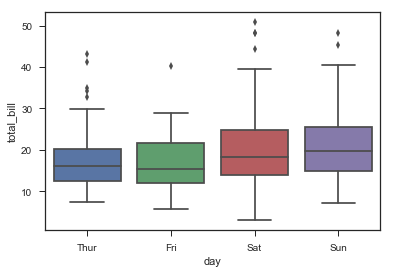

In [21]:
sns.set_style("ticks")
sns.boxplot(x="day", y="total_bill", data=tips)

In the above plot we observe 2 changes:

- There are no horizontal line/grid in the background, that we had in previous figure.
- There are `ticks` on X and Y axes, representing the axis interval.

We still have top and right axes spine so let's get rid of that now:

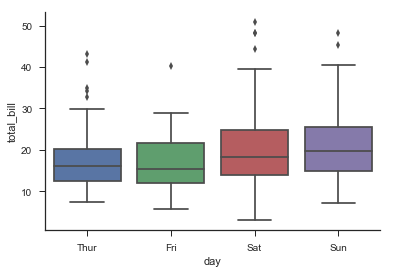

In [20]:
sns.set_style("ticks")
sns.boxplot(x="day", y="total_bill", data=tips)
sns.despine()

If we also want to despine left axis, we just need to alter our last line of code by adding a parameter: `(left=True)`, and it shall fetch:

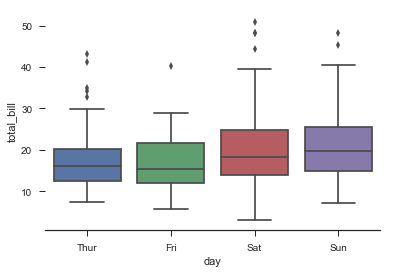

In [24]:
sns.set_style("ticks")
sns.boxplot(x="day", y="total_bill", data=tips)
sns.despine(left=True)

Now let us try to temporarily visualize two types of background in a single plot. For this, we shall use `.axes_style()` as follows:

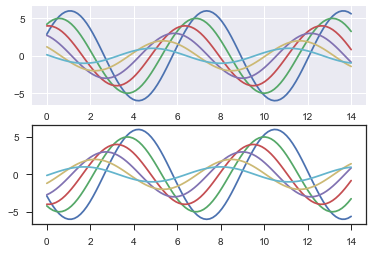

In [27]:
# This function shall help us plot some offset sine waves:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

Let us now look into other independent group of Matplotlib parameters created by Seaborn, i.e. *Scaling* of plot elements; that is controlled using `.plotting_context()` and `.set_context()` functions.

The four preset contexts, in order of relative size, are `paper`, `notebook`, `talk`, and `poster`. The `notebook` style is default, and was used in the plots above. At first let’s reset the default parameters by calling `sns.set()` & then play around with other contexts for scaling, starting with `paper`:

In [28]:
sns.set()

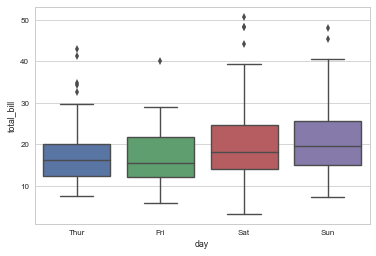

In [29]:
sns.set_context("paper")
sns.set_style("whitegrid")

sns.boxplot(x = "day", y = "total_bill", data = tips)

I am pretty sure you must be thinking that this figure/plot in no ways is scaled as it looks similar to our previous plot outputs. So, I shall clarify that right away:

Jupyter Notebook scales down large images in the notebook cell output. This is generally done because past a certain size, we get automatic figure scaling. For exploratory analysis, we prefer iterating quickly over a number of different analyses and it's more useful to have [facets](https://dictionary.cambridge.org/dictionary/english/facet) that are of similar size; than to have overall figures that are same size in a particular context.

When we're in a situation where we need to have something that's exactly a certain size overall; ideally we:
- know precisely what you want and
- can afford to take off some time and work through the calculations.

With all that being said, if we plot the same figure in an Editor like *Anaconda Spyder* or *JetBrains' PyCharm* or *IntelliJ*, we shall be able to visualize them in their original size. Hence what needs to be our take-away from scaling segment, is that an addition of a line of code can fetch the size of image as per our requirement and we may experiment accordingly.

In practical world, we also add a dictionary of parameters using `rc` to have a finer control over the aesthetics. Let me show you an example with the same _sinplot_ function we defined earlier:

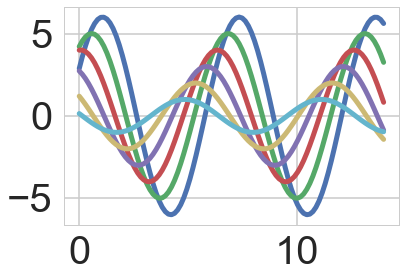

In [36]:
sns.set(style='whitegrid', rc={"grid.linewidth": 1.5})
sns.set_context("poster", font_scale=2.5, rc={"lines.linewidth": 5.0})
sinplot()

Though our Notebook didn't display enlarged (scaled) plot, we may notice how in the backend (in memory) it has created the figure as per our instructions. We have *thick lines* now in our plot because I set `linewidth` to `5`, *font size* on axes have thickened because of `font_scale`. Generally we don't use anything more than that during data analysis although exceptional scenarios may demand few more parameters as per requirement. 

>IMPORTANT NOTE: `%matplotlib inline` just needs to be called once in a kernel unless we refresh/restart the kernel. This is a function that works only in Jupyter Notebook. In other IDE, you will have to explicitly mention either `sns.plt.show()` or just `plt.show()` at the end of your code for plot/figure to be displayed.
Also, style and context once set remains defined unless we explicitly call for a change. If never called in a kernel, Seaborn will work with it's defaults: Matplotlib 'white' background without grids, and 'notebook' scale size.

In the next lecture, we shall see the difference in coding between matplotlib and Seaborn to achieve a certain goal (Regression plot illustration). Till then, happy visualizing!